# Aula 11 - Otimização
## Prof. Luis Lamas

Acompanhe os vídeos no canal do SMART Research Group:
https://www.youtube.com/channel/UCvV5eUanrGET9LWPB8jzWQw

Nessa aula vamos aprender algumas formas diferentes de se encontrar zeros de funções, a partir de otimização (minimização) de funções


### Importação das Bibliotecas relevantes

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Método de Newton Raphson
Inicialmente, vamos programr diretamente o método de Newton-Raphson.

Seja a função $f(x)=3x^2 - 2$

Essa função tem duas raizes reais, $x=\pm\sqrt{\frac{2}{3}}=\pm0.8165$

Para o método de Newton-Raphson, partindo-se de um chute inicial ($x_0$)devemos resolver iterativamente a equação abaixo, até que se encontre um resíduo menor do que a tolerância.

$x_{i+1} = x_i - \frac{f(x)}{f'(x)}$


In [2]:
func = lambda x: 3*x**2 -2
der_func = lambda x: 6*x

tol = 1e-6
res = 10000

x = 2

while res > tol:
    res = func(x)
    der_res = der_func(x)
    x = x - res/der_res
    
print(x)

0.8164965809277259


In [3]:
func = lambda x: 3*x**2 -2

tol = 1e-6
delta = 0.01
res = 10000
x = 2

while res > tol:
    res = func(x)
    res2 = func(x+delta)
    der_res = (res2-res)/delta
    x = x - res/der_res
    
print(x)

0.8164965814673877


In [4]:
np.sqrt(2/3)

0.816496580927726

### Otimização sem restrição, utilizando o scipy
Na sequência, vamos resolver o mesmo problema utilizando funções previamente programadas na biblioteca scipy

https://www.scipy.org/

In [5]:
from scipy.optimize import minimize

func = lambda x: np.abs(3*x**2 - 2)

res = minimize(func, x0=2)  # , method='Nelder-Mead', tol=1e-6)
print(res)

      fun: 3.6500241273884626e-08
 hess_inv: array([[0.01619401]])
      jac: array([4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 4
     njev: 24
   status: 0
  success: True
        x: array([0.81649657])


Problemas de minimização / maximização

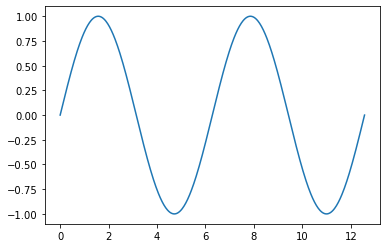

In [6]:
func_min = lambda x: np.sin(x)

t = np.linspace(0, 4*np.pi, 500)
plt.plot(t, func_min(t))

In [7]:
res = minimize(func_min, x0=2) # , method='Nelder-Mead', tol=1e-6)
print(res)

      fun: -1.0
 hess_inv: array([[6.51988556]])
      jac: array([7.4505806e-09])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 2
     njev: 8
   status: 0
  success: True
        x: array([4.71238898])


In [8]:
func_max = lambda x: -func_min(x)
res = minimize(func_max, x0=2)  # , method='Nelder-Mead', tol=1e-6)
print(res)


      fun: -1.0
 hess_inv: array([[1.00002771]])
      jac: array([7.4505806e-09])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([1.57079633])


Vamos utilizar agora uma função de diversas variáveis:

$f(x) = -3x_1^2 + \log{x_2} - \sqrt{x_3}$

In [9]:
from scipy.optimize import minimize

func = lambda x: np.abs(-3*x[0]**2 + np.log(x[1]) - np.sqrt(x[2]))

res = minimize(func, x0=[1, 1, 1], method='Nelder-Mead', tol=1e-6)
print(res)

print(func(res.x))

 final_simplex: (array([[-0.02835806,  2.27300746,  0.67025542],
       [-0.02835716,  2.2730072 ,  0.67025549],
       [-0.02835774,  2.27300735,  0.67025544],
       [-0.02835848,  2.27300737,  0.67025525]]), array([4.30922520e-10, 6.02426331e-10, 6.64354016e-10, 9.57665502e-10]))
           fun: 4.3092251988952057e-10
       message: 'Optimization terminated successfully.'
          nfev: 183
           nit: 97
        status: 0
       success: True
             x: array([-0.02835806,  2.27300746,  0.67025542])
4.3092251988952057e-10


### Otimização com restrição (limites para os valores)

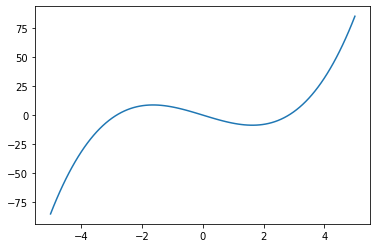

In [10]:
func = lambda x: x[0]**3 - 8*x[0]

x = np.linspace(-5,5,100)
plt.plot(x, func([x,0]))

In [11]:
from scipy.optimize import minimize

limites = ((-2, 2), (0, 1))

res = minimize(func, x0=[1, 1], method='TNC', bounds=limites, tol=1e-6)
print(res)

print(func(res.x))

     fun: -8.709296862943283
     jac: array([-7.49622591e-05, -0.00000000e+00])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 60
     nit: 4
  status: 1
 success: True
       x: array([1.63298552, 1.        ])
-8.709296862943283


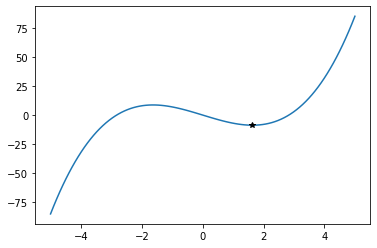

In [12]:
plt.plot(x, func([x,0]), res.x[0], func(res.x), 'k*')

### Otimização com restrições

Imagine que queremos produzir latas cilíndricas de alumínio com um volume de 350 ml. Sabe-se que o material para construir a lateral da lata custa R\\$ 0,10/cm2, e que o material para confeccionar as tampas custa R\\$0,15/cm2.

Deseja-se encontrar as dimensões da lata (altura e raio da tampa) que minimize o custo.

O volume da lata é calculado por $V = \pi\times r^2 \times h$ onde $r$ é o raio da tampa e $h$ a altura da lata.

Portanto, tem-se a restrição de que $\pi\times r^2 \times h = 350$

O custo de produção da lata é $C = 0,15\times2\times \pi \times r^2 + 0,1\times2\times\pi\times r\times h$


In [13]:
def custo(x):
    r = x[0]
    h = x[1]
    c = 0.15 * 2 * np.pi * r**2  + 0.1 * 2 * np.pi * r * h
    return c

def volume(x):
    r = x[0]
    h = x[1]
    v = np.pi * h * r**2
    return v
    
def funcao_objetivo(x):
    return custo(x)

def restricao(x):
    return volume(x)-350

rest = [{'type':'eq', 'fun':restricao}]

x0 = np.array([3,3])

res = minimize(funcao_objetivo, x0, constraints = rest)

print(res)


     fun: 31.471950542392335
     jac: array([12.57756972,  2.09626198])
 message: 'Optimization terminated successfully'
    nfev: 45
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([ 3.33630448, 10.00891068])


In [14]:
custo(res.x)

31.471950542392335

Deseja-se agora, maximizar o volume de uma lata, mas mantendo seu preço de produção menor do que R$ 20,00

In [15]:
def custo(x):
    r = x[0]
    h = x[1]
    c = 0.15 * 2 * np.pi * r**2  + 0.1 * 2 * np.pi * r * h
    return c

def volume(x):
    r = x[0]
    h = x[1]
    v = np.pi * h * r**2
    return v
    
def funcao_objetivo(x):
    return -volume(x)

def restricao(x):
    return 20-custo(x)

rest = [{'type':'ineq', 'fun':restricao}]

x0 = np.array([3, 3])

res = minimize(funcao_objetivo, x0, constraints = rest)

print(res)

     fun: -177.30768017843778
     jac: array([-133.33337212,  -22.22220993])
 message: 'Optimization terminated successfully'
    nfev: 45
     nit: 12
    njev: 11
  status: 0
 success: True
       x: array([2.65961446, 7.97885007])
